# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt

# Loading the data into different classes

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
train_labels.shape

(50000, 1)

In [4]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
train_labels= train_labels.reshape(-1,)
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
test_labels=test_labels.reshape(-1,)
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [7]:
IMAGE_SIZE = 32
BATCH_SIZE = 32
EPOCHS = 50
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualising data

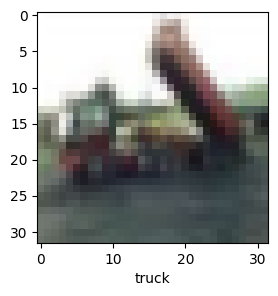

In [8]:
def plot(X,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

plot(train_images,train_labels,2)

# Normalising the dataset

In [9]:
train_images=train_images/255.0
test_images=test_images/255.0

# Building a model

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3),  activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3),  activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.build(input_shape=(None,32,32,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_images,train_labels,
    epochs=50,
    verbose=1,


)


Epoch 1/50
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4707 - accuracy: 0.4689
Epoch 2/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1280 - accuracy: 0.6026
Epoch 3/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9890 - accuracy: 0.6547
Epoch 4/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9088 - accuracy: 0.6831
Epoch 5/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8398 - accuracy: 0.7083
Epoch 6/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7847 - accuracy: 0.7250
Epoch 7/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7344 - accuracy: 0.7423
Epoch 8/50
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6924 - accuracy: 0.7579
Epoch 9/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6527 - accuracy: 0.7713
Epoch 10/50
1563/1563 [==============================] - 55s 35m

In [13]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 2.9738 - accuracy: 0.6546


[2.9738450050354004, 0.6546000242233276]

In [14]:
predictions=model.predict(test_images)
predictions[:5]

313/313 [==============================] - 4s 11ms/step


array([[2.60707735e-19, 2.36709697e-12, 2.26014736e-12, 9.98938978e-01,
        8.19457853e-07, 1.06024963e-03, 3.66076569e-09, 4.32298299e-16,
        6.30134746e-12, 2.04589890e-17],
       [4.19804768e-04, 1.59958873e-07, 1.04701638e-25, 1.73839737e-25,
        6.13247356e-19, 1.00860297e-29, 4.11708107e-36, 9.23389898e-33,
        9.99574482e-01, 5.64110633e-06],
       [3.47746015e-01, 6.83889812e-06, 8.94679331e-11, 3.12416785e-04,
        1.51937257e-03, 1.24039163e-03, 7.41971131e-15, 2.36270607e-05,
        6.49151266e-01, 1.60318692e-08],
       [9.99986231e-01, 6.94886423e-13, 5.56135069e-11, 1.87781721e-10,
        8.43586978e-09, 2.93176978e-20, 4.09328880e-23, 2.46357754e-19,
        1.36620965e-05, 6.35110996e-13],
       [2.56527139e-19, 1.03074825e-15, 6.33083232e-07, 3.04144691e-04,
        8.16724479e-01, 1.98842520e-09, 1.82970747e-01, 1.26854698e-17,
        8.11428509e-19, 1.05381285e-21]], dtype=float32)

In [15]:
label_classes=[np.argmax(element) for element in predictions]
label_classes[:5]

[3, 8, 8, 0, 4]

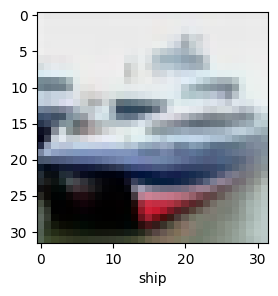

In [16]:
plot(test_images,test_labels,1)

In [17]:
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

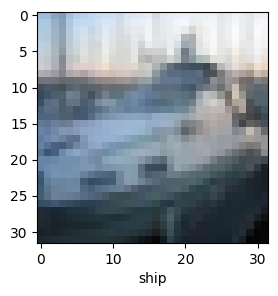

In [22]:
plot(test_images,test_labels,2)

In [23]:
classes[label_classes[2]]

'ship'

In [20]:
print("Classification Report: \n", classification_report(test_labels,label_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      1000
           1       0.81      0.74      0.77      1000
           2       0.53      0.51      0.52      1000
           3       0.49      0.46      0.47      1000
           4       0.58      0.65      0.61      1000
           5       0.50      0.62      0.55      1000
           6       0.74      0.70      0.72      1000
           7       0.73      0.69      0.71      1000
           8       0.80      0.74      0.77      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.66     10000
weighted avg       0.66      0.65      0.66     10000



Text(95.72222222222221, 0.5, 'Truth')

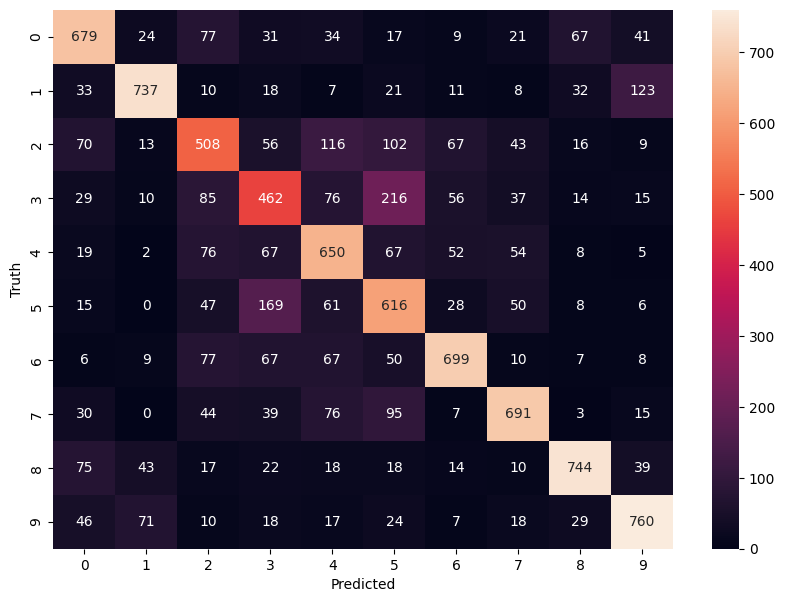

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(test_labels,label_classes),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')